Pemuatan dan Pembersihan Data Awal + Delete-duplikasi

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier # Atau model lain pilihan Anda
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

Load Dataset music

In [2]:
df = pd.read_csv('dataset/music_data.csv')
df.head()    

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Hapus kolom indeks supaya lebih rapi

In [3]:
# Hapus kolom indeks
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Kolom 'Unnamed: 0' dihapus.")

Kolom 'Unnamed: 0' dihapus.


Cek kembali dataset

In [4]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Check duplikat bedasarkan track_id

In [5]:
# Periksa duplikat berdasarkan track_id sebelum labeling
print(f"Jumlah baris sebelum de-duplikasi: {len(df)}")
initial_duplicates = df['track_id'].duplicated().sum()
if initial_duplicates > 0:
    print(f"Menemukan {initial_duplicates} baris duplikat berdasarkan 'track_id'. Menghapus...")
    df = df.drop_duplicates(subset=['track_id'], keep='first')
    print(f"Jumlah baris setelah de-duplikasi: {len(df)}")
else:
    print("Tidak ditemukan baris duplikat berdasarkan 'track_id'.")

Jumlah baris sebelum de-duplikasi: 114000
Menemukan 24259 baris duplikat berdasarkan 'track_id'. Menghapus...
Jumlah baris setelah de-duplikasi: 89741


Check null di kolom

In [6]:
# Check apakah ada null di kolom 
print("\nJumlah nilai null per kolom (setelah de-duplikasi):")
print(df.isnull().sum())


Jumlah nilai null per kolom (setelah de-duplikasi):
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Rekayasa Fitur - Pelabelan Mood

In [7]:
def assign_mood(row):
    valence = row['valence']
    energy = row['energy']
    danceability = row['danceability']
    instrumentalness = row['instrumentalness']
    tempo = row['tempo']
    acousticness = row.get('acousticness', 0)  # Menggunakan 0 jika tidak tersedia
    
    # Happy: Energik, positif, danceable
    if energy > 0.7 and valence > 0.6 and danceability > 0.6:
        return 'Happy'
    
    # Sad: Energi rendah, valence rendah, sering akustik
    elif energy < 0.4 and valence < 0.4 and acousticness > 0.5:
        return 'Sad'
    
    # Anger: Sangat energik, valence rendah, tempo tinggi
    elif energy > 0.75 and valence < 0.35 and tempo > 140:
        return 'Anger'
    
    # Focused: Instrumental, tidak terlalu energik, tempo moderat
    elif instrumentalness > 0.6 and energy < 0.5 and tempo < 115 and danceability < 0.5:
        return 'Focused'
    
    # Romantic: Valence dan energi sedang, tempo sedang
    elif 0.4 < valence < 0.7 and 0.2 < energy < 0.6 and 60 < tempo < 125:
        return 'Romantic'
    
    # Relaxed/Chill: Energi rendah tapi valence tinggi
    elif energy < 0.4 and valence > 0.5:
        return 'Relaxed'
    
    # Fallback logic dengan lebih banyak nuansa
    else:
        if valence > 0.6 and energy > 0.6:
            return 'Happy'
        elif valence < 0.4 and energy < 0.4:
            return 'Sad'
        elif valence < 0.4 and energy > 0.6:
            return 'Anger'
        elif valence > 0.5 and energy < 0.5:
            return 'Relaxed'
        else:
            return 'Neutral'
# Terapkan fungsi untuk membuat kolom 'mood'
df['mood'] = df.apply(assign_mood, axis=1)

# Hapus baris dimana mood tidak dapat ditentukan (jika Anda menggunakan 'Neutral' atau None)
# df = df[df['mood'] != 'Neutral']
# df = df.dropna(subset=['mood']) # Jika assign_mood bisa menghasilkan None

print("\nDistribusi Mood yang Dihasilkan:")
print(df['mood'].value_counts())
print(f"Total baris setelah pelabelan mood (dan potensi filtering): {len(df)}")

# Cek jika ada mood yang tidak terlabel (None)
if df['mood'].isnull().any():
    print("\nPeringatan: Beberapa baris tidak mendapatkan label mood.")


Distribusi Mood yang Dihasilkan:
mood
Neutral     25771
Happy       21912
Anger       18658
Sad         11949
Romantic     6181
Relaxed      4699
Focused       571
Name: count, dtype: int64
Total baris setelah pelabelan mood (dan potensi filtering): 89741


Pemilihan fitur (x) dan target (y)

In [8]:
# Pilih fitur numerik yang akan digunakan untuk melatih model
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'mode', 'duration_ms'] # Tambah/kurangi sesuai kebutuhan
target = 'mood'

# Pisahkan fitur (X) dan target (y)
X = df[features]
y = df[target]

# Tangani nilai NaN HANYA di fitur numerik (X)
# Mengisi dengan median adalah pilihan yang robust terhadap outlier
print("\nMengisi nilai NaN pada fitur (X) dengan median kolom...")
X = X.fillna(X.median())

# Verifikasi bahwa tidak ada NaN lagi di X
print("Jumlah NaN di X setelah diisi:")
print(X.isnull().sum())


Mengisi nilai NaN pada fitur (X) dengan median kolom...
Jumlah NaN di X setelah diisi:
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
mode                0
duration_ms         0
dtype: int64


Pembagian Data training dan testing

In [9]:
# --- 4. Pembagian Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,       # Ukuran test set (misal: 25%)
    random_state=42,      # Untuk reproduktifitas
    stratify=y            # Sangat penting untuk menjaga proporsi kelas
)

print("\nUkuran Data:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print("\nDistribusi Mood di Training Set:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi Mood di Test Set:")
print(y_test.value_counts(normalize=True))


Ukuran Data:
X_train: (67305, 11)
X_test: (22436, 11)
y_train: (67305,)
y_test: (22436,)

Distribusi Mood di Training Set:
mood
Neutral     0.287170
Happy       0.244172
Anger       0.207904
Sad         0.133155
Romantic    0.068880
Relaxed     0.052359
Focused     0.006359
Name: proportion, dtype: float64

Distribusi Mood di Test Set:
mood
Neutral     0.287172
Happy       0.244161
Anger       0.207925
Sad         0.133134
Romantic    0.068863
Relaxed     0.052371
Focused     0.006374
Name: proportion, dtype: float64


Feature Scaling supaya memiliki rentang yang sama

In [10]:
scaler = StandardScaler()

# Fit scaler HANYA pada data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform data training dan testing dengan scaler yang sama
X_test_scaled = scaler.transform(X_test)
print("\nFitur berhasil di-scaling.")


Fitur berhasil di-scaling.


Training model menggunakan Random forest

In [11]:
model = RandomForestClassifier(
    n_estimators=150,       # Jumlah pohon (bisa di-tuning)
    random_state=42,
    class_weight='balanced', # Membantu jika kelas tidak seimbang
    n_jobs=-1               # Gunakan semua core CPU jika memungkinkan
)

print("\nMemulai pelatihan model Random Forest...")
# Latih model
model.fit(X_train_scaled, y_train)

print("Pelatihan model selesai.")


Memulai pelatihan model Random Forest...
Pelatihan model selesai.


Evaluasi model 


Membuat prediksi pada data testing...

Akurasi Model: 0.9993

Laporan Klasifikasi:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00      4665
     Focused       1.00      0.97      0.98       143
       Happy       1.00      1.00      1.00      5478
     Neutral       1.00      1.00      1.00      6443
     Relaxed       1.00      1.00      1.00      1175
    Romantic       0.99      1.00      1.00      1545
         Sad       1.00      1.00      1.00      2987

    accuracy                           1.00     22436
   macro avg       1.00      0.99      1.00     22436
weighted avg       1.00      1.00      1.00     22436


Confusion Matrix:


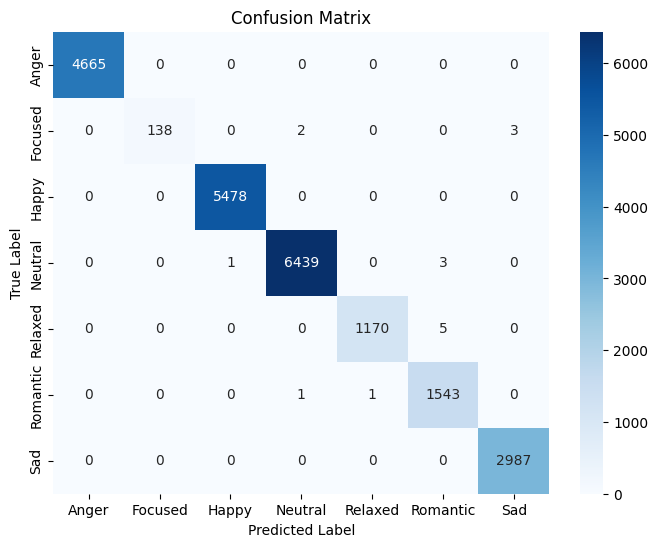

In [12]:
print("\nMembuat prediksi pada data testing...")
# Prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.4f}")

print("\nLaporan Klasifikasi:")
mood_labels = sorted(y_test.unique())
print(classification_report(y_test, y_pred, labels=mood_labels, target_names=mood_labels))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=mood_labels)

# Visualisasi CM
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=mood_labels, yticklabels=mood_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Testing semua jenis mood

In [13]:
def recommend_music_v2(mood_input, all_music_df_with_predictions, num_recommendations=10):
    """
    Merekomendasikan musik berdasarkan mood, menghilangkan duplikat berdasarkan track_id.

    Args:
        mood_input (str): Mood yang dipilih pengguna (e.g., 'Happy').
        all_music_df_with_predictions (pd.DataFrame): DataFrame lengkap DENGAN
                                                     kolom 'predicted_mood', 'track_id',
                                                     'popularity', dan 'track_genre'.
        num_recommendations (int): Jumlah rekomendasi yang diinginkan.

    Returns:
        pd.DataFrame atau str: DataFrame berisi lagu unik yang direkomendasikan atau pesan error.
    """
    # 1. Filter lagu berdasarkan mood yang diprediksi
    filtered_songs = all_music_df_with_predictions[
        all_music_df_with_predictions['predicted_mood'] == mood_input
    ].copy()

    if filtered_songs.empty:
        # Kembalikan pesan lebih awal jika tidak ada lagu yang cocok SAMA SEKALI
        return f"Tidak ditemukan lagu di dataset dengan prediksi mood '{mood_input}'."

    # 2. Hapus duplikat berdasarkan track_id (INI KUNCINYA!)
    #    Pertahankan baris pertama yang ditemukan untuk setiap track_id
    if 'track_id' not in filtered_songs.columns:
        return "Error: Kolom 'track_id' tidak ditemukan untuk de-duplikasi."
    unique_songs = filtered_songs.drop_duplicates(subset=['track_id'], keep='first')

    # Cek lagi jika setelah deduplikasi jadi kosong
    if unique_songs.empty:
         return f"Tidak ada lagu unik yang cocok untuk mood '{mood_input}' ditemukan setelah de-duplikasi."

    # 3. Urutkan lagu unik berdasarkan popularitas (menurun) dan ambil N teratas
    # Pastikan kolom popularity ada
    if 'popularity' not in unique_songs.columns:
        return "Error: Kolom 'popularity' tidak ditemukan untuk pengurutan."
    recommended_songs = unique_songs.sort_values(by='popularity', ascending=False).head(num_recommendations)

    # Pemeriksaan terakhir jika head() menghasilkan kosong (seharusnya tidak terjadi jika unique_songs tidak kosong)
    if recommended_songs.empty and not unique_songs.empty:
         return f"Gagal mendapatkan {num_recommendations} rekomendasi teratas untuk mood '{mood_input}', meskipun lagu unik ditemukan."

    return recommended_songs

# --- PERSIAPAN DATA LENGKAP DENGAN PREDIKSI (PENTING!) ---
# Pastikan Anda menjalankan bagian ini setelah melatih model dan scaler
print("Memastikan DataFrame `df_full` siap dengan prediksi mood...")

# Gunakan DataFrame 'df' yang sudah bersih dan deduplikasi dari langkah awal pelatihan
df_full = df.copy()

# Pastikan semua fitur yang dibutuhkan ada dan tangani NaN HANYA di fitur numerik
if not all(item in df_full.columns for item in features):
    raise ValueError(f"Tidak semua kolom fitur ({features}) ditemukan di df_full.")
df_full[features] = df_full[features].fillna(df_full[features].median())

# Pastikan kolom lain yang dibutuhkan oleh recommend_music_v2 ada
required_cols_for_rec = ['track_id', 'track_genre', 'popularity', 'track_name', 'artists', 'album_name'] + features
missing_cols = [col for col in required_cols_for_rec if col not in df_full.columns]
if missing_cols:
    raise ValueError(f"Kolom berikut hilang dari df_full dan dibutuhkan: {missing_cols}")

# Scaling fitur menggunakan scaler yang SUDAH di-fit
try:
    music_features_scaled = scaler.transform(df_full[features])
except ValueError as e:
    print(f"Error saat scaling: {e}")
    print("Pastikan jumlah fitur di df_full[features] cocok dengan saat scaler di-fit.")
    # exit() # Mungkin perlu menghentikan eksekusi di sini

# Tambahkan kolom prediksi mood ke DataFrame lengkap
try:
    df_full['predicted_mood'] = model.predict(music_features_scaled)
    print("Kolom 'predicted_mood' berhasil ditambahkan ke df_full.")
    print("Distribusi mood yang diprediksi dalam dataset lengkap:")
    print(df_full['predicted_mood'].value_counts())
except Exception as e:
    print(f"Error saat memprediksi mood untuk df_full: {e}")
    # exit() # Mungkin perlu menghentikan eksekusi di sini


# --- PELAKSANAAN TESTING REKOMENDASI PER MOOD ---

# Dapatkan daftar mood unik yang telah diprediksi oleh model Anda
# (Ini lebih baik daripada hardcoding daftar mood)
try:
    all_predicted_moods = df_full['predicted_mood'].unique()
    # Hapus nilai null jika ada (misalnya jika fungsi assign_mood bisa menghasilkan None)
    moods_to_test = [mood for mood in all_predicted_moods if pd.notna(mood)]
    print(f"\nMood yang akan diuji: {moods_to_test}")
except KeyError:
    print("Error: Kolom 'predicted_mood' tidak ditemukan di df_full. Pastikan langkah persiapan di atas berhasil.")
    moods_to_test = [] # Set ke list kosong agar loop tidak berjalan

# Tentukan jumlah rekomendasi yang ingin ditampilkan per mood
num_recommendations_to_show = 10

print("\n" + "="*60)
print(f" MEMULAI PENGUJIAN REKOMENDASI (TOP {num_recommendations_to_show} LAGU PER MOOD) ")
print("="*60 + "\n")

if not moods_to_test:
    print("Tidak ada mood yang valid untuk diuji. Pengujian dibatalkan.")
else:
    for current_mood in moods_to_test:
        print(f"--- [ Pengujian untuk Mood: {current_mood} ] ---")

        # Panggil fungsi rekomendasi
        recommendations_result = recommend_music_v2(
            mood_input=current_mood,
            all_music_df_with_predictions=df_full,
            num_recommendations=num_recommendations_to_show
        )

        # Periksa hasil dan cetak
        if isinstance(recommendations_result, pd.DataFrame):
            if not recommendations_result.empty:
                # Kolom yang ingin ditampilkan
                cols_display = ['track_name', 'artists', 'album_name', 'track_genre', 'popularity', 'predicted_mood']
                # Pastikan hanya menampilkan kolom yang benar-benar ada di hasil
                cols_display_exist = [col for col in cols_display if col in recommendations_result.columns]

                print(f"Rekomendasi ditemukan ({len(recommendations_result)} lagu):")
                # Gunakan to_string() untuk tampilan yang lebih rapi di konsol, terutama jika nama lagu panjang
                print(recommendations_result[cols_display_exist].to_string(index=False))
            else:
                # Kasus ini seharusnya ditangani oleh return string di fungsi, tapi sebagai jaga-jaga
                print(f"Tidak ada rekomendasi yang dihasilkan (DataFrame kosong) untuk mood '{current_mood}'.")
        elif isinstance(recommendations_result, str):
            # Cetak pesan error/informasi dari fungsi recommend_music_v2
            print(f"Info/Error: {recommendations_result}")
        else:
            # Jika fungsi mengembalikan tipe data yang tidak terduga
            print(f"Hasil tidak terduga untuk mood '{current_mood}': {type(recommendations_result)}")

        print("-" * 60) # Pemisah antar mood

print("\n" + "="*60)
print(" PENGUJIAN REKOMENDASI SELESAI ")
print("="*60 + "\n")

Memastikan DataFrame `df_full` siap dengan prediksi mood...
Kolom 'predicted_mood' berhasil ditambahkan ke df_full.
Distribusi mood yang diprediksi dalam dataset lengkap:
predicted_mood
Neutral     25770
Happy       21913
Anger       18658
Sad         11952
Romantic     6187
Relaxed      4695
Focused       566
Name: count, dtype: int64

Mood yang akan diuji: ['Relaxed', 'Sad', 'Neutral', 'Romantic', 'Anger', 'Happy', 'Focused']

 MEMULAI PENGUJIAN REKOMENDASI (TOP 10 LAGU PER MOOD) 

--- [ Pengujian untuk Mood: Relaxed ] ---
Rekomendasi ditemukan (10 lagu):
                       track_name                     artists                               album_name track_genre  popularity predicted_mood
                   cómo dormiste?                      Rels B                           cómo dormiste?      latino          89        Relaxed
            Every Breath You Take                  The Police          Synchronicity (Remastered 2003)        rock          86        Relaxed
          

Simpan model dan scaler

In [14]:
import joblib
# Asumsikan 'model' adalah model terlatih Anda dan 'scaler' adalah scaler ter-fit Anda
joblib.dump(model, 'models/mood_model.joblib')
joblib.dump(scaler, 'models/mood_scaler.joblib')
print("Model dan Scaler berhasil disimpan ke folder 'models/'.")

Model dan Scaler berhasil disimpan ke folder 'models/'.


In [15]:
df_prediksi = pd.read_csv('dataset/dummy.csv')
df_prediksi

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,correct_mood
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,Relaxed
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,Sad
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,Sad
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,Sad
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,Neutral
5,7ytR5pFWmSjzHJIeQkgog4,Dua Lipa,Future Nostalgia,Don't Start Now,88,183290,False,0.793,0.7930,11,-4.521,0,0.0830,0.0125,0.000000,0.0951,0.677,123.950,4,Happy
6,4RVwu0g32PAqgUiJoXsdNw,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",when the party's over,85,196077,False,0.367,0.1110,8,-14.084,1,0.0972,0.9780,0.000040,0.0897,0.198,82.648,4,Sad
7,6WrI0LAC5M1Rw2MnX2ZvEg,Tiësto,The Business,The Business,80,164000,False,0.798,0.6200,7,-7.079,0,0.2320,0.4140,0.019200,0.1120,0.235,120.031,4,Anger
8,2takcwOaAZWiXQijPHIx7B,Linkin Park,Meteora,Numb,86,185586,False,0.496,0.8630,8,-4.116,1,0.0413,0.0061,0.000000,0.6390,0.243,110.018,4,Anger
9,1IX47gefluXmXKzrU4G66X,Khalid,American Teen,Location,84,219146,True,0.736,0.4490,1,-11.746,0,0.4220,0.0751,0.000431,0.0893,0.326,80.035,4,Neutral


In [ ]:
import pandas as pd
# Diasumsikan 'model', 'scaler', dan 'FEATURES' sudah ada dan dilatih/didefinisikan sebelumnya
# Diasumsikan juga fungsi 'assign_mood' sudah didefinisikan persis seperti yang Anda berikan

# --- Pastikan Fungsi assign_mood Tersedia ---
# Salin definisi fungsi assign_mood Anda ke sini
def assign_mood(row):
    valence = row.get('valence', 0) # Gunakan .get() untuk keamanan jika kolom hilang
    energy = row.get('energy', 0)
    danceability = row.get('danceability', 0)
    instrumentalness = row.get('instrumentalness', 0)
    tempo = row.get('tempo', 0)
    acousticness = row.get('acousticness', 0)

    # Happy: Energik, positif, danceable
    if energy > 0.7 and valence > 0.6 and danceability > 0.6:
        return 'Happy'
    # Sad: Energi rendah, valence rendah, sering akustik
    elif energy < 0.4 and valence < 0.4 and acousticness > 0.5:
        return 'Sad'
    # Anger: Sangat energik, valence rendah, tempo tinggi
    elif energy > 0.75 and valence < 0.35 and tempo > 140:
        return 'Anger'
    # Focused: Instrumental, tidak terlalu energik, tempo moderat
    elif instrumentalness > 0.6 and energy < 0.5 and tempo < 115 and danceability < 0.5:
        return 'Focused'
    # Romantic: Valence dan energi sedang, tempo sedang
    elif 0.4 < valence < 0.7 and 0.2 < energy < 0.6 and 60 < tempo < 125:
        return 'Romantic'
    # Relaxed/Chill: Energi rendah tapi valence tinggi
    elif energy < 0.4 and valence > 0.5:
        return 'Relaxed'
    # Fallback logic dengan lebih banyak nuansa
    else:
        if valence > 0.6 and energy > 0.6:
            return 'Happy'
        elif valence < 0.4 and energy < 0.4:
            return 'Sad'
        elif valence < 0.4 and energy > 0.6:
            return 'Anger'
        elif valence > 0.5 and energy < 0.5:
            return 'Relaxed'
        else:
            return 'Neutral'

# --- 1. Muat Data Baru dari CSV ---
try:
    df_prediksi = pd.read_csv('data_prediksi_10.csv') # Sesuaikan nama file jika berbeda
    print("--- Data Baru (10 baris) Berhasil Dimuat ---")
    # Hapus kolom 'key' jika ada di CSV tapi tidak di FEATURES (sesuaikan jika 'key' ada di FEATURES Anda)
    if 'key' in df_prediksi.columns and 'key' not in FEATURES:
         print("Menghapus kolom 'key' dari data prediksi karena tidak ada di FEATURES...")
         df_prediksi = df_prediksi.drop('key', axis=1)
    # Hapus kolom 'track_genre' jika ada di CSV tapi tidak di FEATURES
    if 'track_genre' in df_prediksi.columns and 'track_genre' not in FEATURES:
         print("Menghapus kolom 'track_genre' dari data prediksi karena tidak ada di FEATURES...")
         df_prediksi = df_prediksi.drop('track_genre', axis=1)

except FileNotFoundError:
    print("Error: File 'data_prediksi_10.csv' tidak ditemukan. Pastikan file ada di lokasi yang benar.")
    exit()
except Exception as e:
    print(f"Error saat memuat CSV: {e}")
    exit()


# --- 2. Hasilkan Label "Original" (Berdasarkan Aturan Anda) ---
print("\nMenghasilkan label 'original' berdasarkan aturan assign_mood...")
df_prediksi['original_mood_rule'] = df_prediksi.apply(assign_mood, axis=1)
print("Label 'original' selesai dibuat.")
FEATURES = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'mode', 'duration_ms']

# --- 3. Preprocessing untuk Prediksi Model ---
print("\nMelakukan preprocessing data untuk model...")
# 3a. Pilih Fitur (Pastikan list FEATURES sudah benar)
try:
    X_prediksi = df_prediksi[FEATURES]
except KeyError as e:
    print(f"Error: Fitur '{e}' yang dibutuhkan model tidak ditemukan di data CSV.")
    print("Pastikan list FEATURES Anda cocok dengan kolom di CSV (setelah penghapusan 'key'/'track_genre' jika perlu).")
    exit()

# 3b. Tangani Null (jika ada) - Gunakan median dari training set jika memungkinkan
if X_prediksi.isnull().any().any():
     print("Peringatan: Nilai null ditemukan di fitur data prediksi. Mengisi dengan 0 (contoh)...")
     # Ideal: X_prediksi = X_prediksi.fillna(X_train.median()) # Jika X_train tersedia
     X_prediksi = X_prediksi.fillna(0) # Untuk contoh
else:
    print("Tidak ada nilai null ditemukan di fitur.")

# 3c. Skalakan Fitur (Gunakan scaler.transform())
try:
    X_prediksi_scaled = scaler.transform(X_prediksi)
    print("Scaling fitur berhasil.")
except ValueError as e:
     print(f"Error scaling: {e}. Cek NaN atau jumlah/urutan fitur.")
     exit()
except Exception as e:
    print(f"Error tidak terduga saat scaling: {e}")
    exit()


# --- 4. Lakukan Prediksi dengan Model ---
print("\nMemprediksi mood menggunakan model Random Forest...")
try:
    prediksi_mood_model = model.predict(X_prediksi_scaled)
    print("Prediksi model selesai.")
except Exception as e:
     print(f"Error saat prediksi model: {e}")
     exit()

# --- 5. Tambahkan Hasil Prediksi Model ke DataFrame ---
df_prediksi['predicted_mood_model'] = prediksi_mood_model


# --- 6. Tampilkan Perbandingan ---
print("\n--- Perbandingan Label Original (Aturan) vs. Prediksi Model ---")
print(df_prediksi[['track_name', 'artists', 'original_mood_rule', 'predicted_mood_model']])

Error: File 'data_prediksi_10.csv' tidak ditemukan. Pastikan file ada di lokasi yang benar.

Menghasilkan label 'original' berdasarkan aturan assign_mood...
Label 'original' selesai dibuat.

Melakukan preprocessing data untuk model...
Tidak ada nilai null ditemukan di fitur.
Scaling fitur berhasil.

Memprediksi mood menggunakan model Random Forest...
Prediksi model selesai.

--- Perbandingan Label Original (Aturan) vs. Prediksi Model ---
                   track_name                 artists original_mood_rule  \
0                      Comedy             Gen Hoshino            Relaxed   
1            Ghost - Acoustic            Ben Woodward                Sad   
2              To Begin Again  Ingrid Michaelson;ZAYN                Sad   
3  Can't Help Falling In Love            Kina Grannis                Sad   
4                     Hold On        Chord Overstreet            Neutral   
5             Don't Start Now                Dua Lipa              Happy   
6       when the party's o

: 